In [15]:
import pandas as pd
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(URL)

Text(0.5, 1.0, 'Median value of owner-occupied homes')

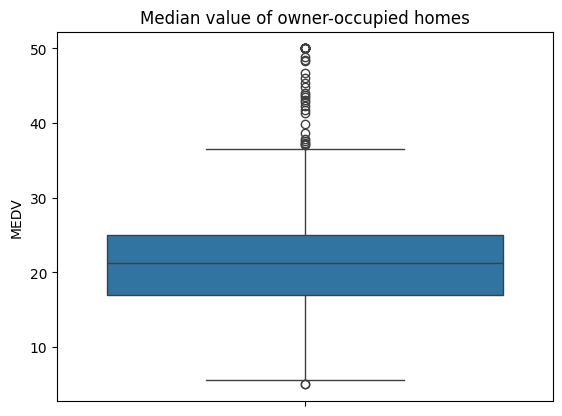

In [4]:
sns.boxplot(y = 'MEDV', data = boston_df).set_title('Median value of owner-occupied homes')

Text(0.5, 1.0, 'Bar plot for Charles river variable')

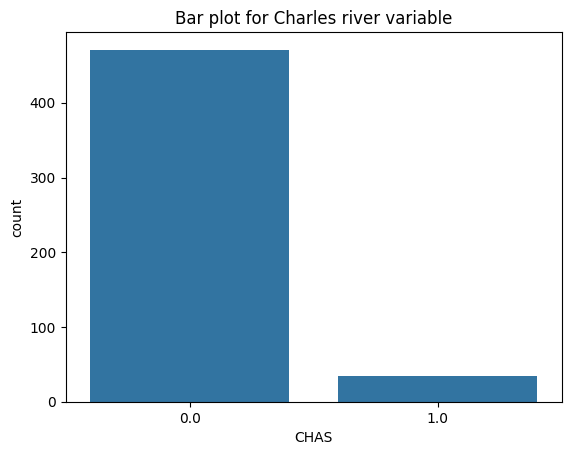

In [7]:
sns.countplot(x='CHAS', data=boston_df).set_title('Bar plot for Charles river variable')

Text(0.5, 1.0, 'MEDV vs AGE')

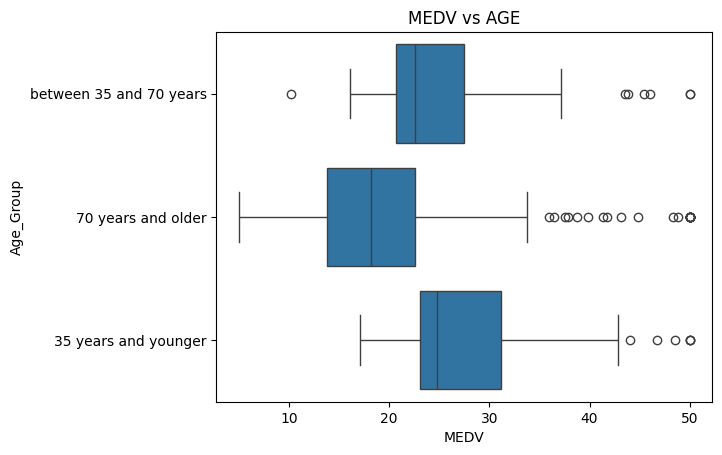

In [8]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'
sns.boxplot(x='MEDV', y='Age_Group', data=boston_df).set_title('MEDV vs AGE')

Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')

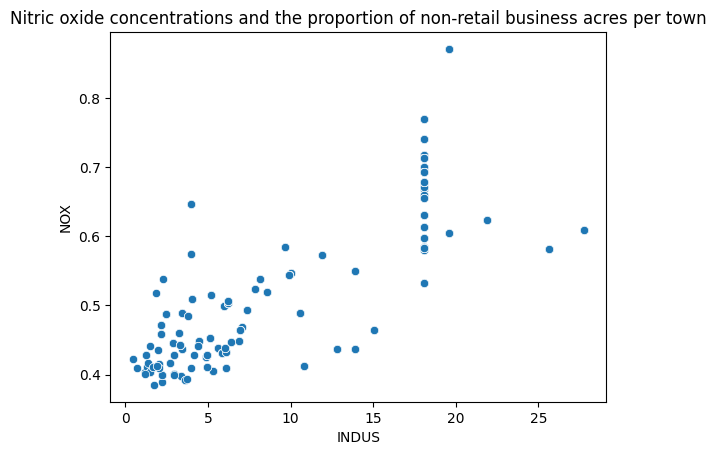

In [9]:
sns.scatterplot(x='INDUS', y='NOX', data = boston_df).set_title('Nitric oxide concentrations and the proportion of non-retail business acres per town')

There is a clear relationship: more non-retail business -> larger Nitric oxide concentrations

Text(0.5, 1.0, 'Pupil to teacher ratio')

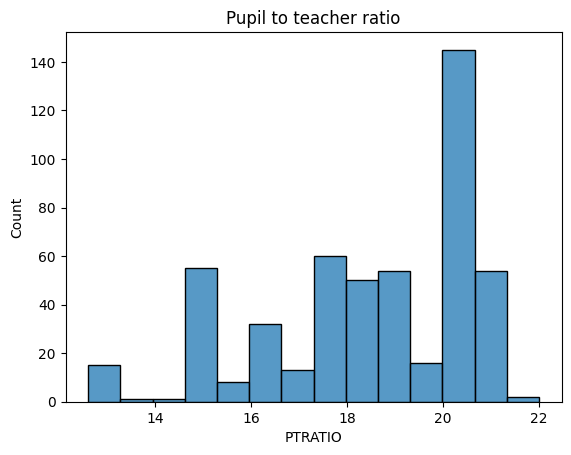

In [10]:
sns.histplot(x = 'PTRATIO', data = boston_df).set_title('Pupil to teacher ratio')

In [12]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_Dist'] = 'Otherwise'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_Dist'] = 'Tract bounds river'
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_Dist'] == 'Otherwise']['MEDV'], 
                      boston_df[boston_df['CHAS_Dist'] == 'Tract bounds river']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519902e-05, df=504.0)

Null hypothesis: There is a significant difference in median value of houses bounded by the Charles river
Alternative hypothesis: No such difference.
Conclusion: Since p-value is too small, we reject the null hypothesis, hence, there is no significant difference.

In [16]:
lm = ols('MEDV ~ AGE', data = boston_df).fit()
result = sm.stats.anova_lm(lm)
print(result)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Null hypothesis: There isn't a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
Alternative: There is a difference.
Conclusion: Since p-value is too small, we reject the null hypothesis, hence, there is a difference.

In [17]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061236247e-98)

Null hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
Alternative: There is a relationship.
Conclusion: Since p-value is too small, we reject the null hypothesis, hence, there is a relationship.

In [18]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
m = sm.OLS(y, x).fit()
prediction = m.predict(x)
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        00:36:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since DIS is 1.0916, it increases the median value by 1.0916.